In [1]:
import asimov_database as ad
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('float_format', '{:f}'.format)

In [5]:
reader = ad.ParquetReader()

In [120]:
md_incremental = reader.get_parquet(symbol='DOLF20',date='2019-11-12',type_='events')

In [7]:
mini_dol = md_incremental['incremental'].read().to_pandas()

In [8]:
mini_dol= mini_dol.dropna()

In [9]:
mini_dol = mini_dol.reset_index()

In [10]:
mini_dol['type'] = 'mini_inc'

In [11]:
mini_dol.head()

,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type
0,2019-12-06 11:55:01.234000+00:00,67327084,12896079,WDOF20,INSERT,B,1.000000,744121280689.000000,88.000000,11:55:01.234000,4150.000000,5.000000,None,5,mini_inc
1,2019-12-06 11:55:01.608000+00:00,67327085,12896080,WDOF20,INSERT,B,1.000000,744121280690.000000,88.000000,11:55:01.608000,4177.000000,2.000000,None,6,mini_inc
2,2019-12-06 11:55:02.454000+00:00,67327087,12896082,WDOF20,INSERT,B,3.000000,744121280692.000000,88.000000,11:55:02.453000,4133.000000,2.000000,None,7,mini_inc
3,2019-12-06 11:55:03.858000+00:00,67327088,12896083,WDOF20,INSERT,A,1.000000,744121280693.000000,386.000000,11:55:03.857000,4220.000000,1.000000,None,8,mini_inc
4,2019-12-06 11:55:05.795000+00:00,67327090,12896085,WDOF20,INSERT,B,1.000000,744121280694.000000,3.000000,11:55:05.795000,4178.000000,40.000000,None,9,mini_inc


In [12]:
mini_dol_snap = md_incremental['snapshot'].read().to_pandas()


In [13]:
mini_dol_snap = mini_dol_snap.reset_index()

In [14]:
mini_dol_snap['type'] = 'mini_snap'


In [75]:
mini_dol_snap.head()


,index,ts,msg_seq_num,symbol,side,position,order_id,broker,order_ts,price,quantity,type


In [16]:
mini_dol_snap.sort_values(by='order_ts', kind = 'mergesort').head()#['order_id']#.unique()#['order_id'].plot(style='-', figsize=(15,6))

,index,ts,msg_seq_num,symbol,side,position,order_id,broker,order_ts,price,quantity,type


In [17]:
md_dol = reader.get_parquet(symbol='WDOX19',date='2019-11-12',type_='events')


In [18]:
dol = md_dol['incremental'].read().to_pandas()

In [19]:
dol = dol.dropna()

In [20]:
dol = dol.reset_index()

In [21]:
dol['type'] = 'dol'

In [22]:
dol.head()

,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type
0,2019-12-06 11:55:00.153000+00:00,67327077,12896072,DOLF20,INSERT,A,1.000000,744121280681.000000,3.000000,11:55:00.153000,4200.000000,5.000000,None,4,dol
1,2019-12-06 11:55:00.226000+00:00,67327078,12896073,DOLF20,INSERT,A,2.000000,744121280682.000000,3.000000,11:55:00.225000,4203.000000,5.000000,None,5,dol
2,2019-12-06 11:55:00.245000+00:00,67327079,12896074,DOLF20,INSERT,A,3.000000,744121280683.000000,3.000000,11:55:00.244000,4205.000000,5.000000,None,6,dol
3,2019-12-06 11:55:00.272000+00:00,67327080,12896075,DOLF20,INSERT,A,1.000000,744121280684.000000,3.000000,11:55:00.272000,4175.000000,5.000000,None,7,dol
4,2019-12-06 11:55:00.282000+00:00,67327081,12896076,DOLF20,INSERT,B,1.000000,744121280685.000000,3.000000,11:55:00.282000,4170.000000,10.000000,None,8,dol


In [23]:
dol.merge(mini_dol, on ='order_id', how = 'inner')

,ts_x,id_x,msg_seq_num_x,symbol_x,event_type_x,side_x,position_x,order_id,broker_x,order_ts_x,price_x,quantity_x,status_x,i_x,type_x,ts_y,id_y,msg_seq_num_y,symbol_y,event_type_y,side_y,position_y,broker_y,order_ts_y,price_y,quantity_y,status_y,i_y,type_y


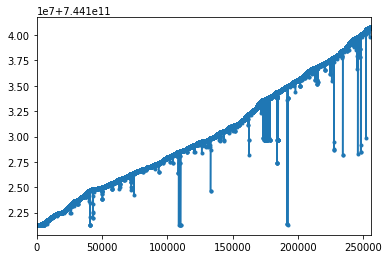

In [24]:
dol['order_id'].plot(style='.-')

In [25]:
all_ = pd.concat([dol, mini_dol])
sorted_ = all_.sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()


In [26]:
sorted_ = all_.sort_values(by='msg_seq_num', kind = 'mergesort').reset_index()

In [27]:
sorted_ = sorted_.drop(['index'], axis =1)

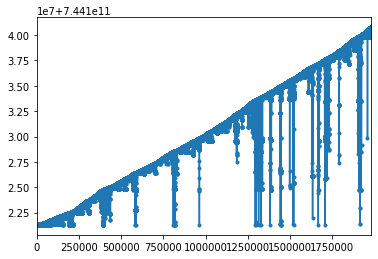

In [28]:
sorted_['order_id'].plot(style='.-')

In [29]:
sorted_.event_type.unique()

array(['INSERT', 'CHANGE'], dtype=object)

In [30]:
sorted_.event_type.value_counts() 

INSERT    1152628
CHANGE     829135
Name: event_type, dtype: int64

In [31]:
sorted2_ = sorted_ [sorted_['event_type'] != 'CHANGE'].reset_index()


In [32]:
sorted2_['gap'] = sorted2_['order_id'] - sorted2_['order_id'].shift(1)

In [33]:
sorted2_.head()

,index,ts,id,msg_seq_num,symbol,event_type,side,position,order_id,broker,order_ts,price,quantity,status,i,type,gap
0,0,2019-12-06 11:55:00.153000+00:00,67327077,12896072,DOLF20,INSERT,A,1.000000,744121280681.000000,3.000000,11:55:00.153000,4200.000000,5.000000,None,4,dol,nan
1,1,2019-12-06 11:55:00.226000+00:00,67327078,12896073,DOLF20,INSERT,A,2.000000,744121280682.000000,3.000000,11:55:00.225000,4203.000000,5.000000,None,5,dol,1.000000
2,2,2019-12-06 11:55:00.245000+00:00,67327079,12896074,DOLF20,INSERT,A,3.000000,744121280683.000000,3.000000,11:55:00.244000,4205.000000,5.000000,None,6,dol,1.000000
3,3,2019-12-06 11:55:00.272000+00:00,67327080,12896075,DOLF20,INSERT,A,1.000000,744121280684.000000,3.000000,11:55:00.272000,4175.000000,5.000000,None,7,dol,1.000000
4,4,2019-12-06 11:55:00.282000+00:00,67327081,12896076,DOLF20,INSERT,B,1.000000,744121280685.000000,3.000000,11:55:00.282000,4170.000000,10.000000,None,8,dol,1.000000


In [34]:
df = sorted2_[sorted2_['gap'] < 0].reset_index()

In [44]:
sorted2_[sorted2_['gap'] < 0].shape

(24, 17)

In [115]:
A=[]
for i in range(0, 1100000, 10000):
    A.append(i)

In [116]:
B= []
for i in range(len(A)):
    a= sorted2_ [sorted2_.gap ==1].loc[A[i]:A[1+i]].shape[0]
    b = (sorted2_.ts[A[1+i]] - sorted2_.ts[A[i]]).seconds + ((sorted2_.ts[A[1+i]] - sorted2_.ts[A[i]]).microseconds)/ (10**6)
    c= sorted2_.order_id[A[1+i]] - sorted2_.order_id[A[i]]
    B.append((c-a)/b)


# DIA 06/12 DOLF,WDOF


# Estimativa de players para intervalor de 1k


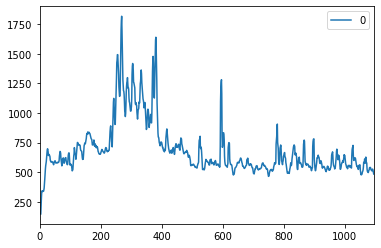

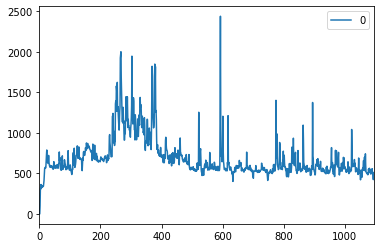

In [58]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

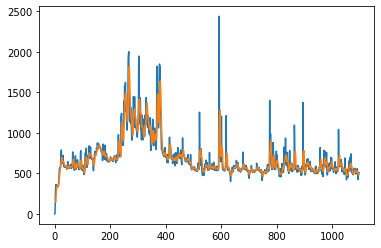

In [59]:
plt.plot(B)
plt.plot(pd.DataFrame(B).rolling(window=5).mean())

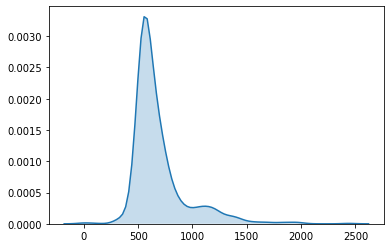

In [60]:
sns.kdeplot(B, shade=True)

In [61]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   686.612563
dtype: float64 0   597.526416
dtype: float64 0   246.517700
dtype: float64


# Estimativa de players para intervalor de 5k


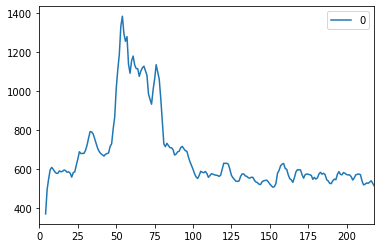

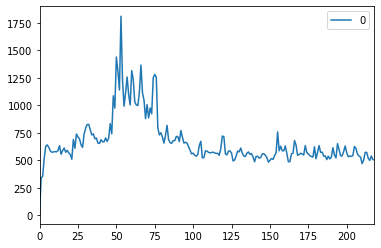

In [65]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

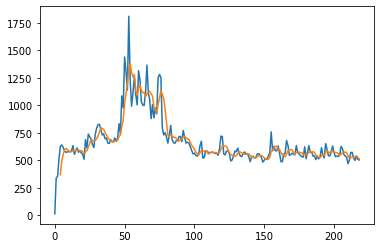

In [66]:
plt.plot(B)
plt.plot(pd.DataFrame(B).rolling(window=5).mean())

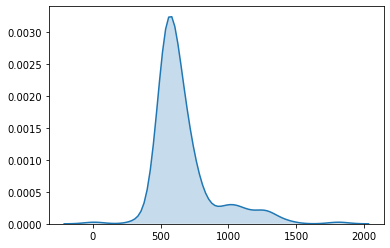

In [67]:
sns.kdeplot(B, shade=True)

In [68]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   666.573113
dtype: float64 0   584.832043
dtype: float64 0   217.315548
dtype: float64


# Estimativa de players para intervalor de 10k


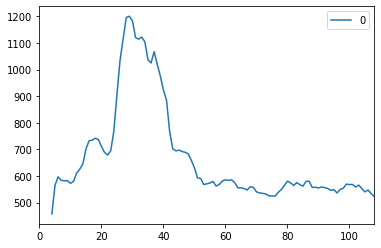

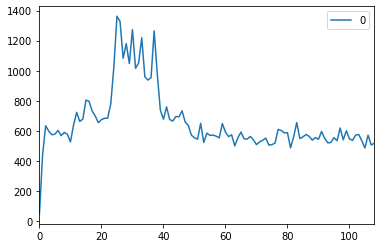

In [71]:
pd.DataFrame(B).rolling(window=5).mean().plot()
pd.DataFrame(B).plot()

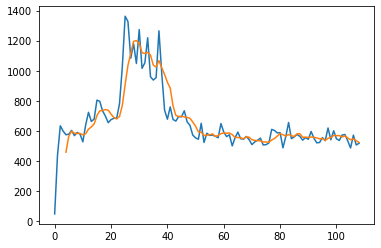

In [72]:
plt.plot(B)
plt.plot(pd.DataFrame(B).rolling(window=5).mean())


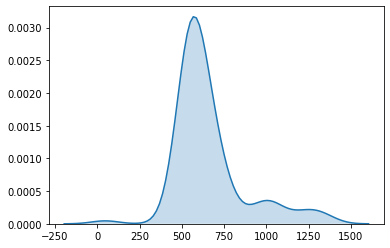

In [73]:
sns.kdeplot(B, shade=True)

In [74]:
print(pd.DataFrame(B).mean(), pd.DataFrame(B).median(), pd.DataFrame(B).std())

0   660.115412
dtype: float64 0   584.049921
dtype: float64 0   207.705751
dtype: float64


# Dia 12/11

# OUTRA ANALISE

In [ ]:
dl = sorted2_[sorted2_['gap'] > 0].reset_index()

In [ ]:
dl.head()

In [ ]:
dl['dt'] =( dl['ts'] - dl['ts'].shift(1))


In [ ]:
dl.head()

In [ ]:
dl['sec'] = dl['dt'].apply(lambda x: x.seconds)
dl['micro'] = dl['dt'].apply(lambda x: x.microseconds)
dl['time'] = dl['sec']+(dl['micro'] /10 ** 6)


In [ ]:
dl  = dl [ dl['time'] != 0]

# dl['DATA_COMPRA'] = dl['DATA_COMPRA'].apply(lambda x : pd.to_datetime(x))

In [ ]:
A = [0]
#while len(dl.index) > 100:
for i in range(150): #(len(dl.index)):# dl.iterrows(): 
    val = np.flatnonzero(np.isclose(dH.time.cumsum().values, 100, atol =.40))[0]
    dH = dl.loc[val+sum(A)::]
    A.append(val)

In [ ]:
dl['cumsum'] = dl.time.cumsum()

In [ ]:
dl = dl.dropna()

In [ ]:
dl = dl.drop(['index'], axis = 1)

In [ ]:
dl= dl.reset_index()